 Detected delimiter: 'B'
✅ Data loaded successfully with shape: (1000098, 52)
 Starting cleaning process...
 Dropped 0 rows with >= 3 missing values from critical fields
⚠️ Skipping totalpremium > 0 filter — would drop too many rows.
✅ Filtered rows with totalclaims >= 0 → Remaining: 1000093
⚠️ Skipping loss_ratio notna filter — would drop too many rows.
⚠️ Skipping loss_ratio outlier filter — would drop too many rows.
✅ Cleaning complete
✅ Cleaned data saved to: ../data/cleaned/machine_learning_rating_cleaned.csv
🧾 Columns in cleaned DataFrame: ['underwrittencoverid', 'policyid', 'transactionmonth', 'isvatregistered', 'citizenship', 'legaltype', 'title', 'language', 'bank', 'accounttype', 'maritalstatus', 'gender', 'country', 'province', 'postalcode', 'maincrestazone', 'subcrestazone', 'itemtype', 'mmcode', 'vehicletype', 'registrationyear', 'make', 'model', 'cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'numberofdoors', 'vehicleintrodate', 'customvalueestimate', 'alarmimmobil

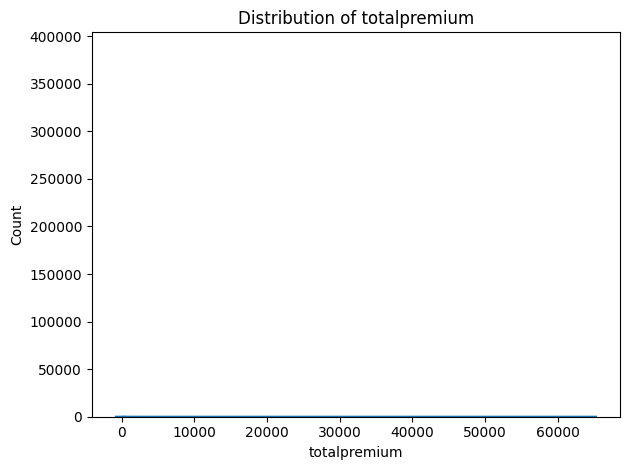

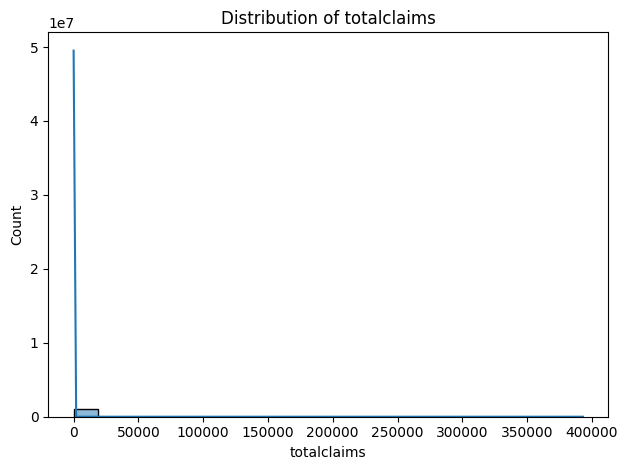

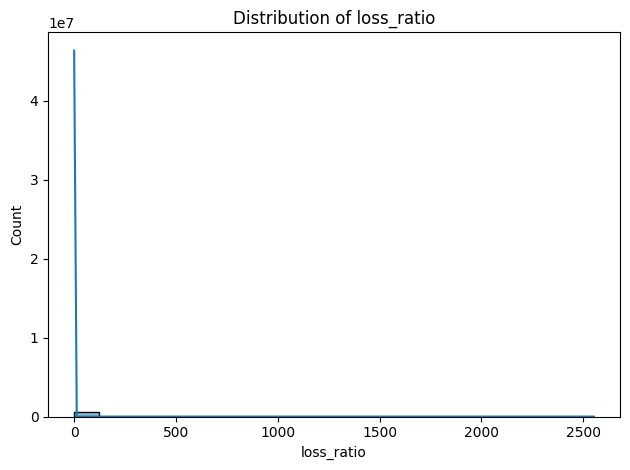

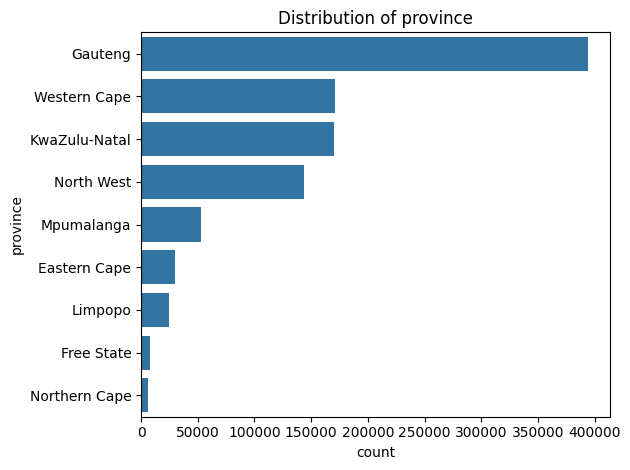

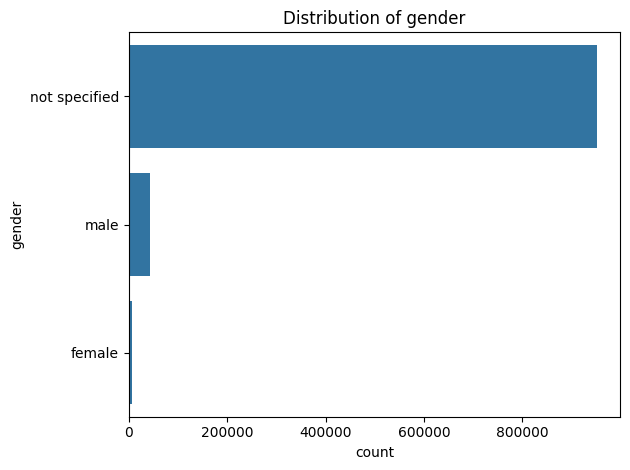

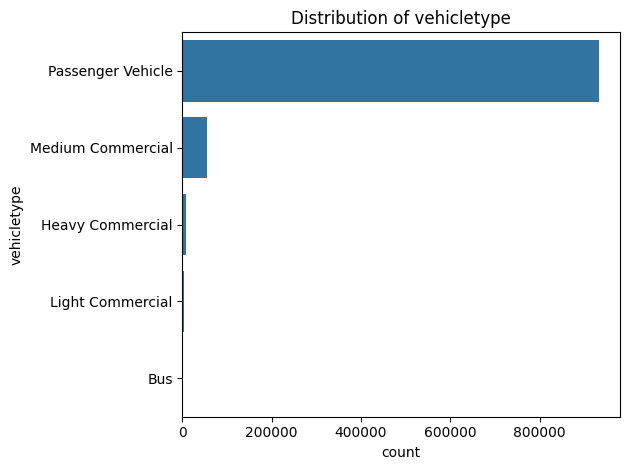

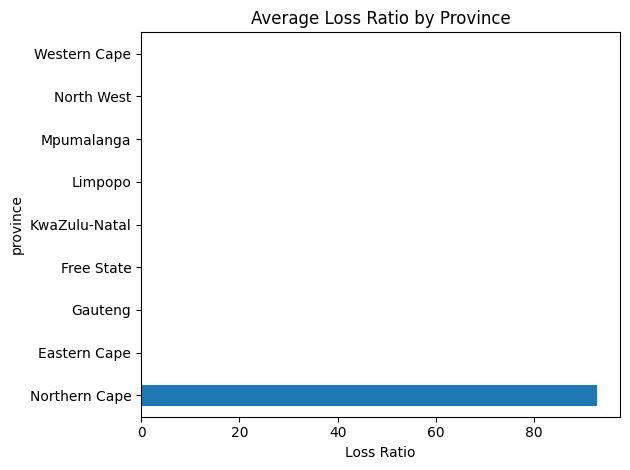

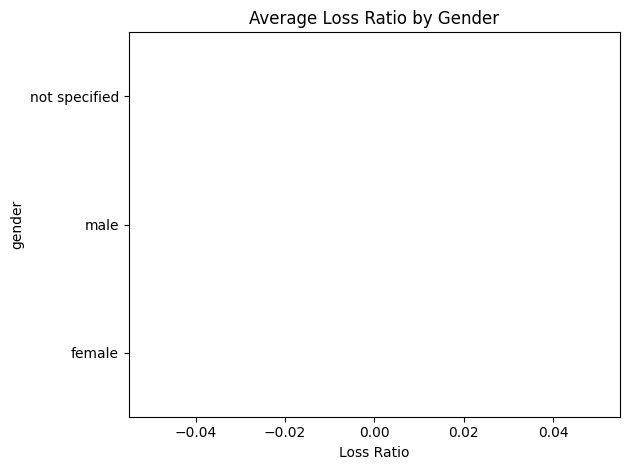

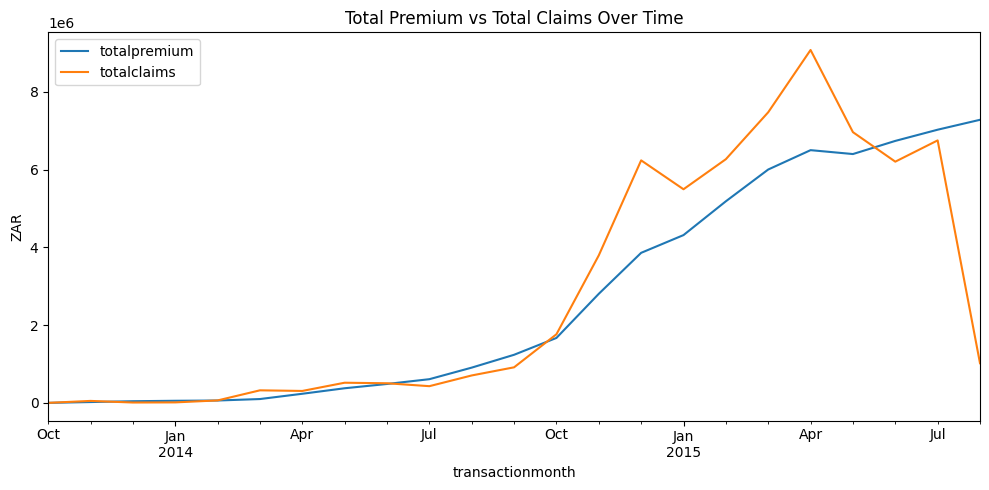

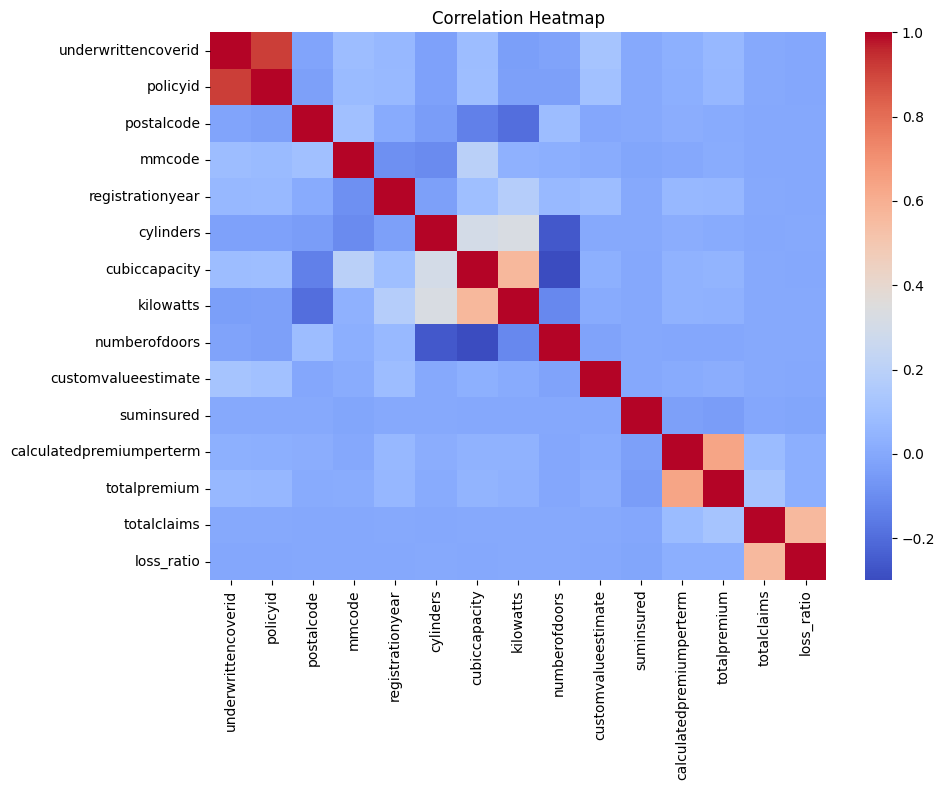

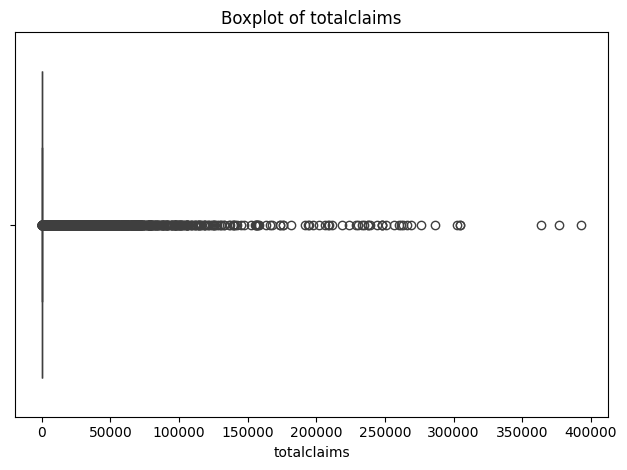

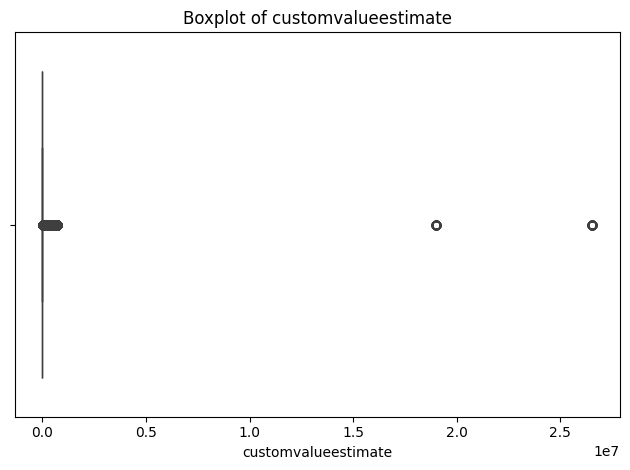

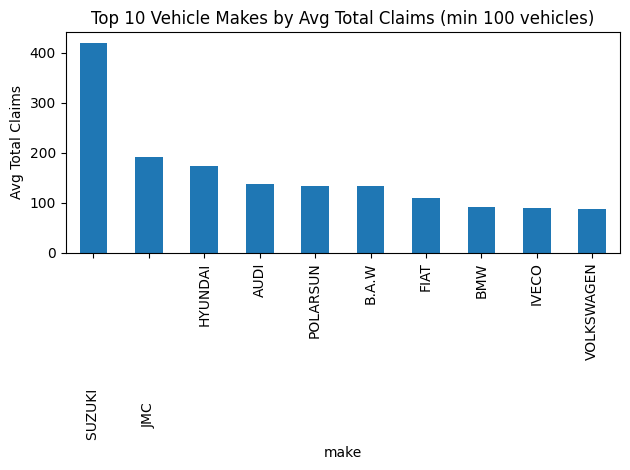

In [1]:
import sys
import os
import importlib
sys.path.append(os.path.abspath(".."))
import src.preprocess
importlib.reload(src.preprocess)
import src.eda
importlib.reload(src.eda)

#  Imports
from src.preprocess import PreProcessData
from src.eda import EDAVisualizer

#  Load the large .txt data file
pipeline = PreProcessData("../data/MachineLearningRating_v3.txt")
pipeline.detect_delimiter()

#  Load using that delimiter
pipeline.load_data(delimiter='|', chunksize=100000)


# Observe raw data
#pipeline.observe_data()

#  Clean and save
pipeline.clean()
pipeline.save_cleaned("../data/cleaned/machine_learning_rating_cleaned.csv")

df = pipeline.df
print("🧾 Columns in cleaned DataFrame:", df.columns.tolist())
print("📏 DataFrame shape:", df.shape)
print("🔍 Data sample:\n", df.head(3))

# EDA


eda = EDAVisualizer(df)  # df = cleaned DataFrame
eda.distribution_plots()
eda.categorical_distributions()
eda.loss_ratio_grouped(by='province')
eda.loss_ratio_grouped(by='gender')
eda.temporal_trends()
eda.correlation_matrix()
eda.outlier_boxplots()
eda.top_vehicles_by_claims(min_count=100)